In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [15]:
non_correlated_data = pd.read_csv('removed_correlations.csv')
non_correlated_data = non_correlated_data.drop(['Unnamed: 0'], axis=1)
non_correlated_data.head()

,0,1,2,3,5,6
0,1.0,1.0,0.0,341.120176,95.554853,75.181807
1,0.0,0.0,0.0,118.610087,66.456064,93.011581
2,1.0,1.0,0.0,77.254576,40.766024,-1.588632
3,1.0,0.0,1.0,476.980523,144.335903,512.778893
4,1.0,0.0,1.0,258.225846,144.487597,364.063824


In [16]:
X_features = non_correlated_data.iloc[:, :-1].values
y_predicted = non_correlated_data.iloc[:, -1].values
print(y_predicted)

[ 75.18180738  93.01158133  -1.58863177 ... 187.1155391  265.6732347
 352.7798772 ]


## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_features = sc.fit_transform(X_features)

## Splitting the dataset into the Training set and Test set


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
X_train, X_test, Y_train, Y_test = train_test_split (X_features, y_predicted, test_size = 0.20, random_state=21)

In [19]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k = ' , K , 'is:', error)

RMSE value for k =  1 is: 18.16164309624535
RMSE value for k =  2 is: 15.876420522074934
RMSE value for k =  3 is: 14.739636159390761
RMSE value for k =  4 is: 14.306807787885756
RMSE value for k =  5 is: 14.242809659821592
RMSE value for k =  6 is: 14.149440589975212
RMSE value for k =  7 is: 14.041678157277486
RMSE value for k =  8 is: 13.864398330604052
RMSE value for k =  9 is: 13.900589008647419
RMSE value for k =  10 is: 14.022343945127052
RMSE value for k =  11 is: 13.96271930085716
RMSE value for k =  12 is: 14.06754970386497
RMSE value for k =  13 is: 14.195778277733911
RMSE value for k =  14 is: 14.398651227750452
RMSE value for k =  15 is: 14.444565805694486
RMSE value for k =  16 is: 14.413230606384378
RMSE value for k =  17 is: 14.365254274866906
RMSE value for k =  18 is: 14.340317973374562
RMSE value for k =  19 is: 14.4263524111966
RMSE value for k =  20 is: 14.585458385784484


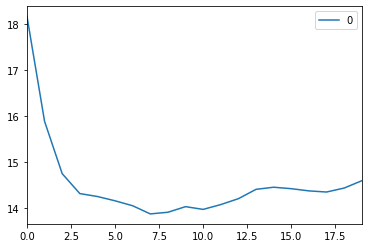

In [20]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

### We can see at k = 8, we have the minimum value RMSE and then it starts going up again so we choose k = 8

In [21]:
regressor=KNeighborsRegressor(8)
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
print(mean_squared_error(Y_test,Y_pred))

192.22154106965644


## Using Grid Search find best k value

In [22]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params ,cv=5)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 8}

## Therfore with both our methods, we get k = 8 as the most appropriate value. 
## Choose k = 8

## Predicting the Test set results

In [23]:
y_pred = regressor.predict(X_test)

## Evaluate score by cross validation

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = Y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.72 %
Standard Deviation: 0.11 %


# Accuracy = 98.72%